In [1]:
#Importing necessary library that will use in model building.


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam


print(tf.__version__)

2.3.0


In [2]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas.util.testing as tm

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


In [5]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load and return the breast cancer classification dataset. The breast cancer dataset is a classic and very easy binary classification dataset.

In [6]:
cancer = datasets.load_breast_cancer()

In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

We will be using pandas DataFrame to present all our data. We will create a dataframe with our cancer data and target data. It would help us to store all the inputs and outputs in one dataframe.

In [8]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y = cancer.target


In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
X.shape

(569, 30)

It is not possible for us to manually split our dataset also we need to split the dataset in a random manner. To help us with this task, we will be using a SciKit library named train_test_split. We will be using 80% of our dataset for training purposes and 20% for testing.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [19]:
X_train.shape

(455, 30)

In [20]:
X_test.shape

(114, 30)

StandardScaler removes the mean and scales the data to unit variance.

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114, 30, 1)


Now, Let’s go ahead and build our CNN model

In [23]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

Compile defines the loss function, the optimizer, and the metrics. That’s all. It has nothing to do with the weights and you can compile a model as many times as you want without causing any problem to pretrained weights.

In [25]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])


Trains the model for a fixed number of epochs (iterations on a dataset).

In [26]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
15/15 [==============================] - 0s 17ms/step - loss: 0.8903 - accuracy: 0.6549 - val_loss: 0.6557 - val_accuracy: 0.8684
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5745 - accuracy: 0.7165 - val_loss: 0.6235 - val_accuracy: 0.9035
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.4732 - accuracy: 0.7934 - val_loss: 0.5940 - val_accuracy: 0.9035
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3622 - accuracy: 0.8440 - val_loss: 0.5635 - val_accuracy: 0.9035
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.3454 - accuracy: 0.8484 - val_loss: 0.5346 - val_accuracy: 0.9035
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3353 - accuracy: 0.8659 - val_loss: 0.5066 - val_accuracy: 0.8947
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.2575 - accuracy: 0.9033 - val_loss: 0.4813 - val_accuracy: 0.9035
Epoch 8/50
15/15 [=

In [27]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

A history object that contains all information collected during training.

In [29]:
history.history

{'loss': [0.8903173804283142,
  0.5744959712028503,
  0.4731552302837372,
  0.36224570870399475,
  0.3453613221645355,
  0.3352645933628082,
  0.2574780285358429,
  0.2520189881324768,
  0.24990259110927582,
  0.22218291461467743,
  0.21286022663116455,
  0.22015823423862457,
  0.21413347125053406,
  0.2092328518629074,
  0.1733608990907669,
  0.17991946637630463,
  0.14644575119018555,
  0.2011909931898117,
  0.1629750281572342,
  0.14861051738262177,
  0.1333097368478775,
  0.12359700351953506,
  0.1422170251607895,
  0.17645379900932312,
  0.14236436784267426,
  0.129944309592247,
  0.13892918825149536,
  0.1547395884990692,
  0.12725046277046204,
  0.12022141367197037,
  0.11826559901237488,
  0.12685102224349976,
  0.11560265719890594,
  0.11351191997528076,
  0.11887823790311813,
  0.11495213955640793,
  0.09977980703115463,
  0.1197466254234314,
  0.10949075222015381,
  0.10381598770618439,
  0.1114775612950325,
  0.17478857934474945,
  0.11230777949094772,
  0.11220181733369827

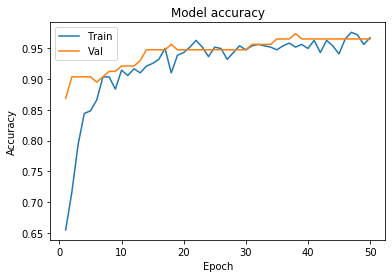

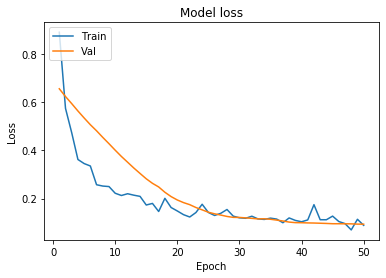

In [30]:
plot_learningCurve(history, epochs)

In Model accuracy graph A validation accuracy is always greater than train accuracy thats means our model is not overfitting.

In Model accuracy graph A validation loss is also very lower than training loss so unless and until validation loss goes above than the training loss than we can keep training our model.

We have successfully created our program to detect breast cancer using Deep neural network. We are able to classify cancer effectively with our CNN technique.